### 콜라보에서 왜인지 자꾸 네임에러가 떠서 복사해서 따로 해봤습니다ㅠㅠ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
buy2018_1 = pd.read_csv('buy2018_1.csv')
buy2018_1 = buy2018_1.drop(['Unnamed: 0'], axis=1)
buy2018_2 = pd.read_csv('buy2018_2.csv')
buy2018_2 = buy2018_2.drop(['Unnamed: 0'], axis=1)
buy2019_1 = pd.read_csv('buy2019_1.csv')
buy2019_1 = buy2019_1.drop(['Unnamed: 0'], axis=1)
buy2019_2 = pd.read_csv('buy2019_2.csv')
buy2019_2 = buy2019_2.drop(['Unnamed: 0'], axis=1)
sns2018_1 = pd.read_csv('sns2018_1.csv')
sns2018_1 = sns2018_1.drop(['Unnamed: 0'], axis=1)
sns2018_2 = pd.read_csv('sns2018_2.csv')
sns2018_2 = sns2018_2.drop(['Unnamed: 0'], axis=1)
sns2019_1 = pd.read_csv('sns2019_1.csv')
sns2019_1 = sns2019_1.drop(['Unnamed: 0'], axis=1)
sns2019_2 = pd.read_csv('sns2019_2.csv')
sns2019_2 = sns2019_2.drop(['Unnamed: 0'], axis=1)
Seoul2018 = pd.read_csv('Seoul2018.csv',encoding='cp949')
Seoul2019 = pd.read_csv('Seoul2019.csv',encoding='cp949')
dust2018 = pd.read_csv('dust2018.csv',encoding='cp949')
dust2019 = pd.read_csv('dust2019.csv',encoding='cp949')

In [10]:
Seoul2018 = Seoul2018.fillna(0)
Seoul2019 = Seoul2019.fillna(0)

## 데이터합치기

In [11]:
buy2018_1.columns = ['date','sex','age','big_cat','sm_cat','qty']
buy2018_2.columns = ['date','sex','age','big_cat','sm_cat','qty']
buy2019_1.columns = ['date','sex','age','big_cat','sm_cat','qty']
buy2019_2.columns = ['date','sex','age','big_cat','sm_cat','qty']
buy20189 = pd.concat([buy2018_1,buy2018_2,buy2019_1,buy2019_2])

In [12]:
sns2018_1.columns = ['date','big_cat','sm_cat','cnt']
sns2018_2.columns = ['date','big_cat','sm_cat','cnt']
sns2019_1.columns = ['date','big_cat','sm_cat','cnt']
sns2019_2.columns = ['date','big_cat','sm_cat','cnt']
sns20189 = pd.concat([sns2018_1,sns2018_2,sns2019_1,sns2019_2])

In [13]:
Seoul20189 = pd.concat([Seoul2018, Seoul2019],ignore_index=True)
dust20189 = pd.concat([dust2018, dust2019],ignore_index=True)

In [14]:
month = ['01']*31+['02']*28+['03']*31+['04']*30+['05']*31+['06']*30+['07']*31+['08']*31+['09']*30+['10']*31+['11']*30+['12']*31
day = list(range(1,32))+list(range(1,29))+list(range(1,32))+list(range(1,31))+list(range(1,32))+list(range(1,31))+list(range(1,32))+list(range(1,32))+list(range(1,31))+list(range(1,32))+list(range(1,31))+list(range(1,32))
for i in range(365):
  if day[i]<10:
    day[i] = '0'+str(day[i])
  else :
    day[i] = str(day[i])

In [15]:
date = []
for i in range(365):
  date.append('2018'+'-'+month[i]+'-'+day[i])
for i in range(365):
  date.append('2019'+'-'+month[i]+'-'+day[i])
df_dust = pd.DataFrame(date)
df_dust.columns = ['날짜']

In [16]:
dust = []
cnt = 0
for i in range(730):
  j = i-cnt
  if (df_dust['날짜'].iloc[i]==dust20189['일시'].iloc[j]):
    dust.append(dust20189['일 미세먼지 농도(㎍/㎥)'].iloc[j])
  else :
    dust.append(np.nan)
    cnt+=1
df_dust['미세먼지'] = pd.Series(dust)
df_dust = df_dust.fillna(method='ffill')

## 구매데이터 분산

In [17]:
food = buy20189[buy20189['big_cat']=='식품']
grouped = food['qty'].groupby(food['sm_cat'])
var = grouped.var()
mean = grouped.mean()
cv = var/mean
sort = cv.sort_values(ascending = False)
sort

sm_cat
커피음료          184.062095
생수            129.806708
감귤/한라봉/오렌지    120.718965
돼지 곱창         117.834267
곶감/반건시        110.800994
                 ...    
건어물 건새우         0.401058
커피용 프림          0.320021
마/야콘            0.229233
영지버섯            0.186790
과일채소 분말/분태      0.077502
Name: qty, Length: 212, dtype: float64

In [18]:
beauty = buy20189[buy20189['big_cat']=='뷰티']
grouped = beauty['qty'].groupby(beauty['sm_cat'])
var = grouped.var()
mean = grouped.mean()
cv = var/mean
sort = cv.sort_values(ascending = False)
sort

sm_cat
스킨케어 수면팩             222.464470
기초 화장용 크림            203.242145
기초 화장용 에센스           125.874584
베이스 메이크업용 메이크업베이스    120.550269
네일 메이크업 용품           117.314210
                        ...    
헤어무스                   0.186764
색조 메이크업 세트             0.077590
향수세트                   0.073574
남성향수                   0.068293
여성향수                   0.000000
Name: qty, Length: 131, dtype: float64

In [19]:
machine = buy20189[buy20189['big_cat']=='냉난방가전']
grouped = machine['qty'].groupby(machine['sm_cat'])
var = grouped.var()
mean = grouped.mean()
cv = var/mean
sort = cv.sort_values(ascending = False)
sort

sm_cat
공기청정기         63.550740
공기정화 용품       44.983444
온수매트          39.932305
히터            37.507450
휴대용 선풍기       34.300481
초음파식 가습기      27.204958
제습기           19.797285
냉풍기           19.677487
온열매트          18.249291
스탠드형 에어컨      17.475430
전기장판          17.042173
복합식 가습기       15.414792
벽걸이 에어컨       14.968417
온풍기           13.172074
멀티형 에어컨       10.925818
의류건조기         10.091664
카페트매트          7.154279
탁상/USB 선풍기     7.078972
이동형 에어컨        6.769720
라디에이터          5.655506
업소용 선풍기        5.545312
벽걸이형 선풍기       4.230032
컨벡터            3.924911
에어워셔           3.304855
에어컨 리모컨        2.756877
스탠드형 냉온풍기      2.440884
자연식 가습기        2.183597
가열식 가습기        1.903722
전기온수기          1.858226
황토매트           1.429280
보일러            0.895423
돈풍기            0.881815
신발건조기          0.779107
벽걸이형 냉온풍기      0.752702
난방용 열풍기        0.418551
천장형 에어컨        0.410382
중대형 에어컨        0.160526
산림욕기           0.137931
에어커튼           0.133457
가스온수기          0.102379
Name: qty, dtype: float64

## SNS데이터 분산

In [20]:
food = sns20189[sns20189['big_cat']=='식품']
grouped = food['cnt'].groupby(food['sm_cat'])
var = grouped.var()
mean = grouped.mean()
cv = var/mean
sort = cv.sort_values(ascending = False)
sort

sm_cat
참외/메론/수박       76.178828
딸기/복분자/블루베리    53.214021
굴비/조기          33.588872
콜라겐/코큐텐 영양제    27.944201
기타 한방/환제품      26.280802
                 ...    
잡곡 씨드류          0.160567
닭 양념육           0.157691
갈비용 우육          0.153569
과실차             0.134569
건바나나            0.127637
Name: cnt, Length: 212, dtype: float64

In [21]:
beauty = sns20189[sns20189['big_cat']=='뷰티']
grouped = beauty['cnt'].groupby(beauty['sm_cat'])
var = grouped.var()
mean = grouped.mean()
cv = var/mean
sort = cv.sort_values(ascending = False)
sort

sm_cat
남성 클렌징             56.102656
남성 스킨              54.251336
남성 크림              40.467332
기능성 화이트닝 화장품       39.603434
남성 세트              36.252831
                     ...    
베이스 메이크업용 트윈케이크     0.198232
스킨케어 곡물팩            0.183310
뷰티 헤어캡              0.155982
세안도구                0.151712
손톱정리도구              0.140647
Name: cnt, Length: 131, dtype: float64

In [22]:
machine = sns20189[sns20189['big_cat']=='냉난방가전']
grouped = machine['cnt'].groupby(machine['sm_cat'])
var = grouped.var()
mean = grouped.mean()
cv = var/mean
sort = cv.sort_values(ascending = False)
sort

sm_cat
히터            109.611378
공기청정기          58.072283
제습기            39.653537
보일러            23.441824
온수매트           19.584617
온풍기            13.309923
전기장판           10.645489
벽걸이 에어컨        10.523831
천장형 에어컨         9.833551
냉풍기             6.683198
에어컨 리모컨         5.770789
휴대용 선풍기         5.244033
이동형 에어컨         4.164955
스탠드형 에어컨        3.925666
초음파식 가습기        3.122416
가열식 가습기         2.825978
온열매트            2.426716
카페트매트           2.290099
벽걸이형 선풍기        2.251205
탁상/USB 선풍기      2.197944
라디에이터           2.101011
에어워셔            1.957806
복합식 가습기         1.922018
컨벡터             1.635578
중대형 에어컨         1.545240
황토매트            1.464917
의류건조기           1.103859
돈풍기             0.920641
멀티형 에어컨         0.722598
공기정화 용품         0.711557
업소용 선풍기         0.551024
자연식 가습기         0.477922
전기온수기           0.469954
신발건조기           0.397438
에어커튼            0.391787
산림욕기            0.284844
스탠드형 냉온풍기       0.265438
벽걸이형 냉온풍기       0.253465
가스온수기           0.249851
난방용 열풍기         0.

## 농산물

In [50]:
food2018 = buy20189[buy20189['big_cat']=='식품']
grouped = food2018.groupby(['date','sm_cat'], as_index=False)
date_cate = grouped.sum()
potato = date_cate[date_cate['sm_cat']=='감자']['qty']
pepper = date_cate[date_cate['sm_cat']=='고추/피망/파프리카']['qty']
mushroom = date_cate[date_cate['sm_cat']=='느타리버섯']['qty']
bellflower = date_cate[date_cate['sm_cat']=='도라지/더덕']['qty']
radish = date_cate[date_cate['sm_cat']=='무/배추']['qty']
spinach = date_cate[date_cate['sm_cat']=='시금치']['qty']
rice = date_cate[date_cate['sm_cat']=='쌀']['qty']
lettuce = date_cate[date_cate['sm_cat']=='쌈채소']['qty']
tomato = date_cate[date_cate['sm_cat']=='토마토']['qty']
onion = date_cate[date_cate['sm_cat']=='파/양파']['qty']
cucumber = date_cate[date_cate['sm_cat']=='오이/가지']['qty']
potato = potato.reset_index(drop=True)
pepper = pepper.reset_index(drop=True)
mushroom = mushroom.reset_index(drop=True)
bellflower = bellflower.reset_index(drop=True)
radish = radish.reset_index(drop=True)
spinach = spinach.reset_index(drop=True)
rice = rice.reset_index(drop=True)
lettuce = lettuce.reset_index(drop=True)
tomato = tomato.reset_index(drop=True)
onion = onion.reset_index(drop=True)
cucumber = cucumber.reset_index(drop=True)

In [51]:
temp = Seoul20189.iloc[:,3]
rain = Seoul20189.iloc[:,13]
wind = Seoul20189.iloc[:,20]
humid = Seoul20189.iloc[:,26]
dust = df_dust.iloc[:,1]
total = pd.concat([temp, rain, wind, humid, dust, potato, pepper, mushroom, bellflower, radish, spinach, rice, lettuce, tomato, onion, cucumber],axis=1)
total.columns = ['temp','rain','wind','humid','dust','potato', 'pepper', 'mushroom', 'bellflower', 'radish', 'spinach', 'rice', 'lettuce', 'tomato', 'onion', 'cucumber']

In [52]:
total = total.fillna(0)

<AxesSubplot:>

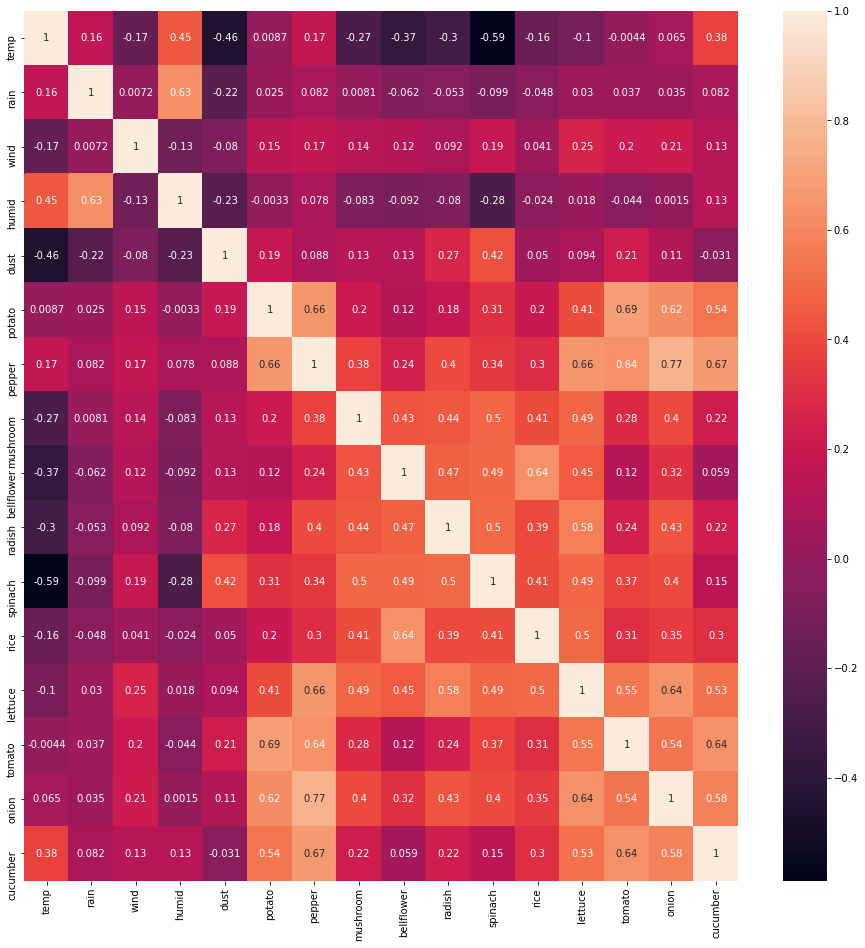

In [53]:
plt.figure(figsize=(16,16))
sns.heatmap(total.corr(method='spearman'),annot=True)

In [84]:
x = total.iloc[:,:5]
def modeling(yvar):
  y = total.iloc[:,total.columns==yvar]
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)
  mlr = LinearRegression()
  mlr.fit(x_train, y_train) 
  y_predict = mlr.predict(x_test)
  dt = DecisionTreeRegressor(random_state=1)
  dt = dt.fit(x_train, y_train)
  dt_predict = dt.predict(x_test)

  print(mlr.coef_)
  print(f'R square : {r2_score(y_test,y_predict):.4f}')
  print(f'MSE of MLR : {mean_squared_error(y_test,y_predict):.4f}')
  print(f'MSE of DT : {mean_squared_error(y_test,dt_predict):.4f}')

  plt.scatter(y_test, y_predict, alpha=0.4)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title("MULTIPLE LINEAR REGRESSION")
  plt.show()

[[-0.70713606  0.05873685  2.4727306  -0.01473429  0.12968899]]
R square : 0.2600
MSE of MLR : 152.1164
MSE of DT : 335.2603


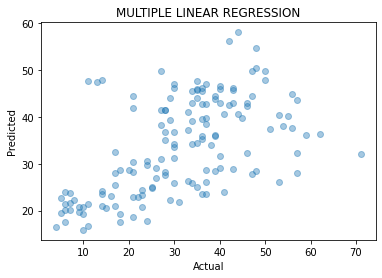

In [44]:
modeling('spinach')

[[-0.47827393 -0.14565901  1.58566428  0.10365294 -0.02975625]]
R square : 0.0184
MSE of MLR : 251.2274
MSE of DT : 919.7397


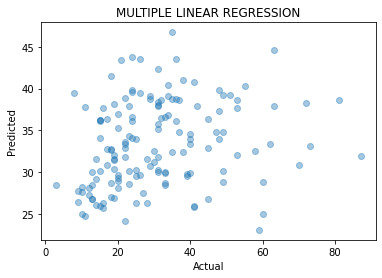

In [45]:
modeling('bellflower')

[[ 1.03030576  0.12669748  5.44340002 -0.12355556  0.19630932]]
R square : 0.2126
MSE of MLR : 331.8567
MSE of DT : 1060.5137


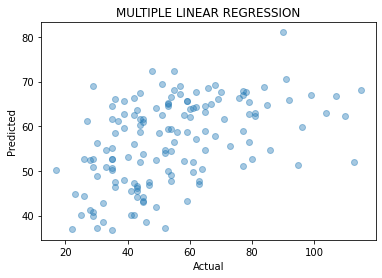

In [54]:
modeling('cucumber')

## 건어물

In [46]:
food2018 = buy20189[buy20189['big_cat']=='식품']
grouped = food2018.groupby(['date','sm_cat'], as_index=False)
date_cate = grouped.sum()
dry_shrimp = date_cate[date_cate['sm_cat']=='건어물 건새우']['qty']
dry_pollack = date_cate[date_cate['sm_cat']=='건어물 노가리']['qty']
dry_squid = date_cate[date_cate['sm_cat']=='건어물 마른오징어']['qty']
dry_anchovy = date_cate[date_cate['sm_cat']=='건어물 멸치']['qty']
dry_filefish = date_cate[date_cate['sm_cat']=='건어물 쥐포']['qty']
dry_seasoned_squid = date_cate[date_cate['sm_cat']=='건어물 진미채']['qty']
dry_alaska_pollack = date_cate[date_cate['sm_cat']=='건어물 황태']['qty']
dry_shrimp = dry_shrimp.reset_index(drop=True)
dry_pollack = dry_pollack.reset_index(drop=True)
dry_squid = dry_squid.reset_index(drop=True)
dry_anchovy = dry_anchovy.reset_index(drop=True)
dry_filefish = dry_filefish.reset_index(drop=True)
dry_seasoned_squid = dry_seasoned_squid.reset_index(drop=True)
dry_alaska_pollack = dry_alaska_pollack.reset_index(drop=True)

In [47]:
temp = Seoul20189.iloc[:,3]
rain = Seoul20189.iloc[:,13]
wind = Seoul20189.iloc[:,20]
humid = Seoul20189.iloc[:,26]
dust = df_dust.iloc[:,1]
total = pd.concat([temp, rain, wind, humid, dust, dry_shrimp, dry_pollack, dry_squid, dry_anchovy, dry_filefish, dry_seasoned_squid, dry_alaska_pollack],axis=1)
total.columns = ['temp','rain','wind','humid','dust','dry_shrimp', 'dry_pollack', 'dry_squid', 'dry_anchovy', 'dry_filefish', 'dry_seasoned_squid', 'dry_alaska_pollack']

In [48]:
total = total.fillna(0)

<AxesSubplot:>

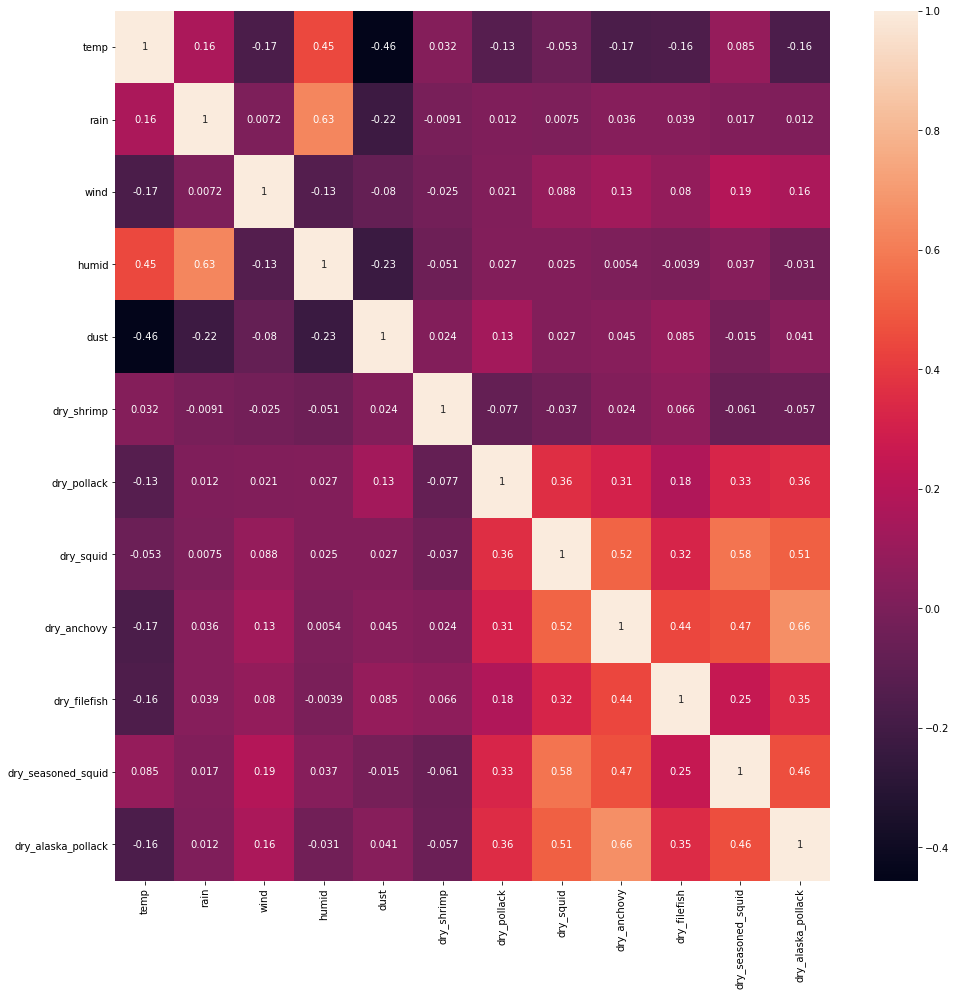

In [49]:
plt.figure(figsize=(16,16))
sns.heatmap(total.corr(method='spearman'),annot=True)

### 정말 아무 관계가 없다는 것을 알 수 있었습니다 하하

# 수산물

In [69]:
food2018 = buy20189[buy20189['big_cat']=='식품']
grouped = food2018.groupby(['date','sm_cat'], as_index=False)
date_cate = grouped.sum()
sole = date_cate[date_cate['sm_cat']=='가자미']['qty']
cutlass = date_cate[date_cate['sm_cat']=='갈치']['qty']
mackerel = date_cate[date_cate['sm_cat']=='고등어']['qty']
corbina = date_cate[date_cate['sm_cat']=='굴비/조기']['qty']
crab = date_cate[date_cate['sm_cat']=='꽃게']['qty']
octopus = date_cate[date_cate['sm_cat']=='낙지']['qty']
pollack = date_cate[date_cate['sm_cat']=='명태/동태']['qty']
cero = date_cate[date_cate['sm_cat']=='삼치']['qty']
shrimp = date_cate[date_cate['sm_cat']=='새우/대하']['qty']
salmon = date_cate[date_cate['sm_cat']=='연어/훈제연어']['qty']
eel = date_cate[date_cate['sm_cat']=='장어']['qty']
abalone = date_cate[date_cate['sm_cat']=='전복 생물']['qty']
oyster = date_cate[date_cate['sm_cat']=='굴 생물']['qty']
shell = date_cate[date_cate['sm_cat']=='조개']['qty']
seaweed = date_cate[date_cate['sm_cat']=='해조류 미역']['qty']
fish = date_cate[date_cate['sm_cat']=='생선류']['qty']
marine = date_cate[date_cate['sm_cat']=='수산 생물']['qty']

sole = sole.reset_index(drop=True)
cutlass = cutlass.reset_index(drop=True)
mackerel = mackerel.reset_index(drop=True)
corbina = corbina.reset_index(drop=True)
crab = crab.reset_index(drop=True)
octopus = octopus.reset_index(drop=True)
pollack = pollack.reset_index(drop=True)
cero = cero.reset_index(drop=True)
shrimp = shrimp.reset_index(drop=True)
salmon = salmon.reset_index(drop=True)
eel = eel.reset_index(drop=True)
abalone = abalone.reset_index(drop=True)
oyster = oyster.reset_index(drop=True)
shell = shell.reset_index(drop=True)
seaweed = seaweed.reset_index(drop=True)
fish = fish.reset_index(drop=True)
marine = marine.reset_index(drop=True)

In [68]:
temp = Seoul20189.iloc[:,3]
rain = Seoul20189.iloc[:,13]
wind = Seoul20189.iloc[:,20]
humid = Seoul20189.iloc[:,26]
dust = df_dust.iloc[:,1]
total = pd.concat([temp, rain, wind, humid, dust, sole, cutlass, mackerel, corbina, crab, octopus, pollack, cero, shrimp, salmon, eel, abalone, oyster, shell, seaweed, fish, marine],axis=1)
total.columns = ['temp','rain','wind','humid','dust','sole', 'cutlass', 'mackerel', 'corbina', 'crab', 'octopus', 'pollack', 'cero', 'shrimp', 'salmon', 'eel', 'abalone', 'oyster', 'shell', 'seaweed', 'fish', 'marine']

In [58]:
total = total.fillna(0)

<AxesSubplot:>

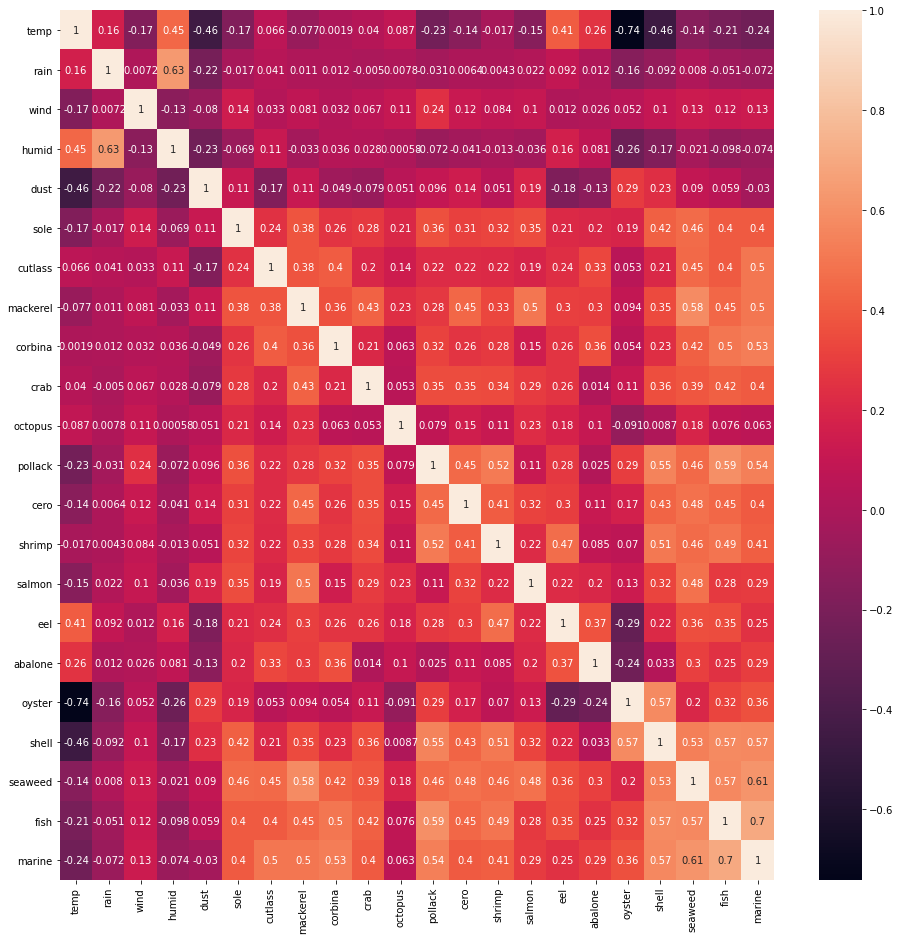

In [70]:
plt.figure(figsize=(16,16))
sns.heatmap(total.corr(method='spearman'),annot=True)

[[-4.63062019 -0.41260505 -6.63509137  0.60439412 -0.07939726]]
R square : 0.1993
MSE of MLR : 4307.9626
MSE of DT : 7594.0685


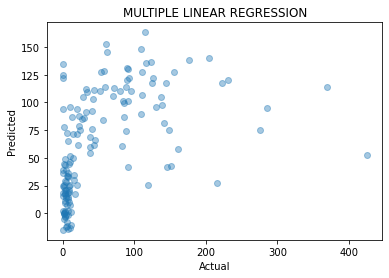

In [61]:
modeling('oyster')

[[-4.12552669 -0.91992187  0.75685213  0.58227457  0.51123333]]
R square : 0.1273
MSE of MLR : 9785.4731
MSE of DT : 25487.8836


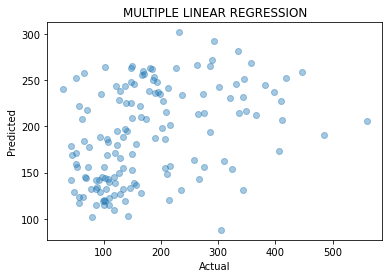

In [62]:
modeling('shell')

[[ 1.07711954e+00 -2.07364998e-04  2.14327303e+00 -1.68667746e-02
  -5.35131287e-02]]
R square : 0.0960
MSE of MLR : 2260.3091
MSE of DT : 2898.6301


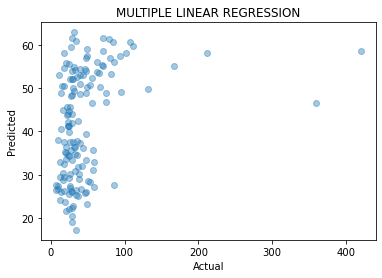

In [63]:
modeling('eel')

[[ 1.93188834  0.06058681  7.88875845 -0.21491456 -0.4674491 ]]
R square : 0.0195
MSE of MLR : 15001.7853
MSE of DT : 37247.9384


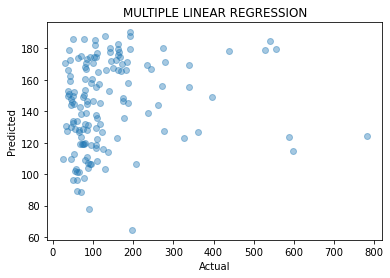

In [64]:
modeling('abalone')

[[-3.22098403e-01 -6.47784743e-02  2.52036530e+00  6.62203006e-02
   1.54404747e-03]]
R square : 0.0235
MSE of MLR : 203.3085
MSE of DT : 311.1575


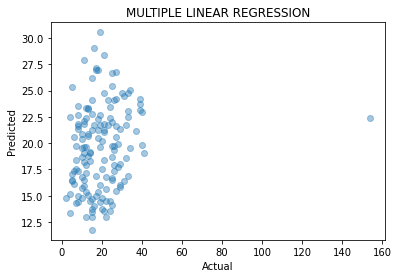

In [65]:
modeling('pollack')

# 공기청정/습도조절 가전제품

In [81]:
air2018 = buy20189[buy20189['big_cat']=='냉난방가전']
grouped = air2018.groupby(['date','sm_cat'], as_index=False)
date_cate = grouped.sum()
airpurifier = date_cate[date_cate['sm_cat']=='공기청정기']['qty']
humidifier1 = date_cate[date_cate['sm_cat']=='복합식 가습기']['qty']
humidifier2 = date_cate[date_cate['sm_cat']=='자연식 가습기']['qty']
humidifier3 = date_cate[date_cate['sm_cat']=='초음파식 가습기']['qty']
humidifier4 = date_cate[date_cate['sm_cat']=='가열식 가습기']['qty']
shoesdryer = date_cate[date_cate['sm_cat']=='신발건조기']['qty']
clothesdryer = date_cate[date_cate['sm_cat']=='의류건조기']['qty']
dehumidifier = date_cate[date_cate['sm_cat']=='제습기']['qty']

airpurifier = airpurifier.reset_index(drop=True)
humidifier1 = humidifier1.reset_index(drop=True)
humidifier2 = humidifier2.reset_index(drop=True)
humidifier3 = humidifier3.reset_index(drop=True)
humidifier4 = humidifier4.reset_index(drop=True)
shoesdryer = shoesdryer.reset_index(drop=True)
clothesdryer = clothesdryer.reset_index(drop=True)
dehumidifier = dehumidifier.reset_index(drop=True)

In [80]:
temp = Seoul20189.iloc[:,3]
rain = Seoul20189.iloc[:,13]
wind = Seoul20189.iloc[:,20]
humid = Seoul20189.iloc[:,26]
dust = df_dust.iloc[:,1]
total = pd.concat([temp, rain, wind, humid, dust, airpurifier, humidifier1, humidifier2, humidifier3, humidifier4, shoesdryer, clothesdryer, dehumidifier],axis=1)
total.columns = ['temp','rain','wind','humid','dust', 'airpurifier', 'humidifier1', 'humidifier2', 'humidifier3', 'humidifier4', 'shoesdryer', 'clothesdryer', 'dehumidifier']

In [78]:
total = total.fillna(0)

<AxesSubplot:>

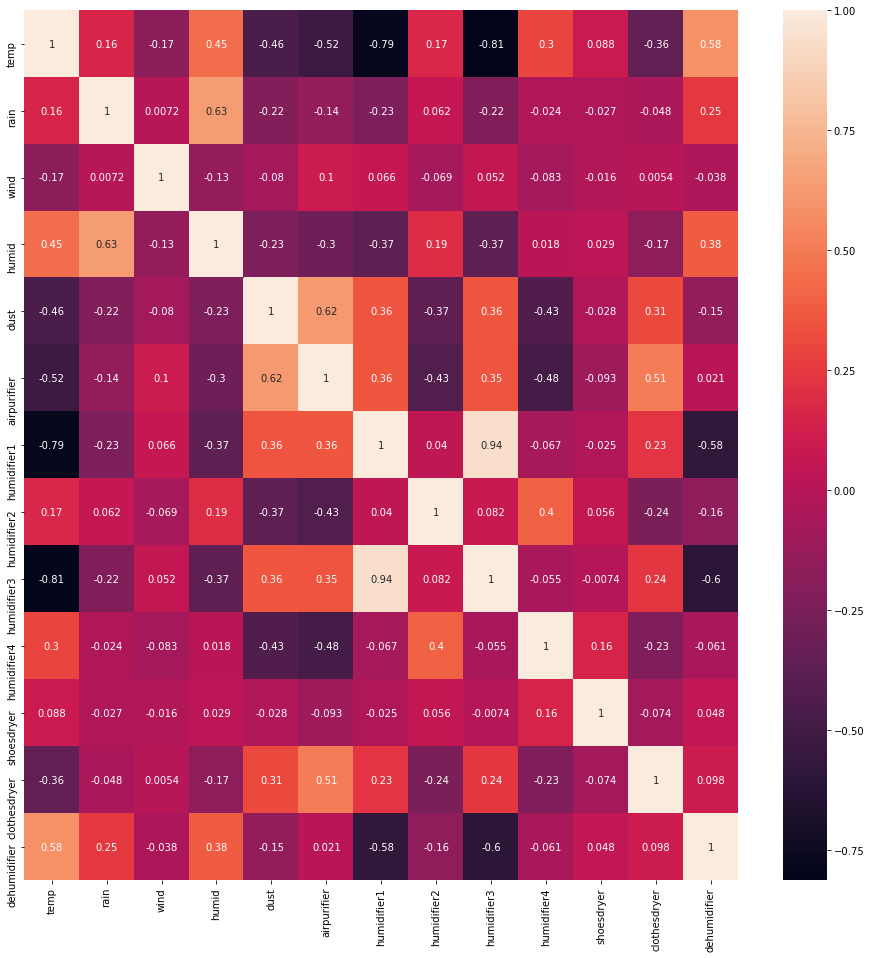

In [82]:
plt.figure(figsize=(16,16))
sns.heatmap(total.corr(method='spearman'),annot=True)

### 회귀모델이 벨류에러가 나네요... 왜...왜죠?